In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as smf
import statsmodels.formula.api as sm
from sklearn.metrics import mean_squared_error

In [5]:
dt = pd.read_csv("Database/delivery_time.csv")

In [6]:
dt.head(5)

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [7]:
dt = dt.rename({'Delivery Time':'Delivery_Time','Sorting Time':'Sorting_Time'}, axis = 1)
print(dt)

    Delivery_Time  Sorting_Time
0           21.00            10
1           13.50             4
2           19.75             6
3           24.00             9
4           29.00            10
5           15.35             6
6           19.00             7
7            9.50             3
8           17.90            10
9           18.75             9
10          19.83             8
11          10.75             4
12          16.68             7
13          11.50             3
14          12.03             3
15          14.88             4
16          13.75             6
17          18.11             7
18           8.00             2
19          17.83             7
20          21.50             5


In [8]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


C:\Users\Hxze.-\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery_Time', ylabel='Density'>

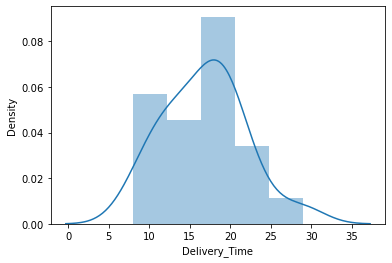

In [10]:
sns.distplot(dt['Delivery_Time'])

C:\Users\Hxze.-\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting_Time', ylabel='Density'>

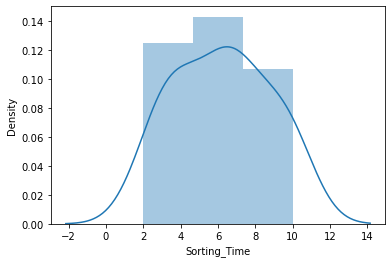

In [12]:
sns.distplot(dt['Sorting_Time'])

In [42]:
dt[dt.duplicated()].shape

(0, 2)

In [44]:
dt[dt.duplicated()]

,Delivery_Time,Sorting_Time


In [13]:
dt.describe()

,Delivery_Time,Sorting_Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


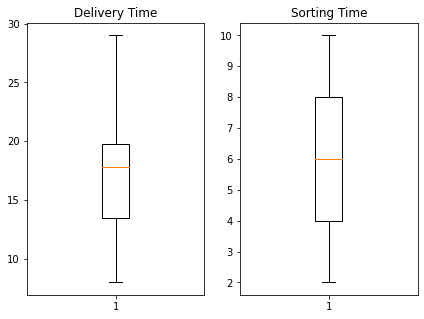

In [15]:
plt.subplots(figsize = (7,5))
plt.subplot(1,2,1)
plt.boxplot(dt['Delivery_Time'])
plt.title('Delivery Time')
plt.subplot(1,2,2)
plt.boxplot(dt['Sorting_Time'])
plt.title('Sorting Time')
plt.show()

In [16]:
dt.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


<AxesSubplot:xlabel='Sorting_Time', ylabel='Delivery_Time'>

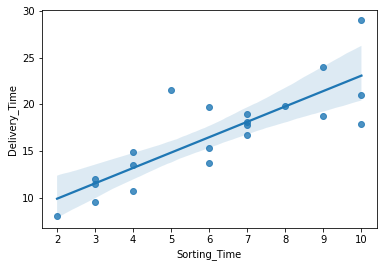

In [19]:
sns.regplot(x=dt['Sorting_Time'],y=dt['Delivery_Time'])

In [20]:
model = sm.ols('Delivery_Time~Sorting_Time', data = dt).fit()

In [22]:
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [23]:
model.tvalues , model.pvalues

(Intercept       3.823349
 Sorting_Time    6.387447
 dtype: float64,
 Intercept       0.001147
 Sorting_Time    0.000004
 dtype: float64)

In [21]:
model.rsquared,model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [25]:
square_root_model = sm.ols('np.sqrt(Delivery_Time)~np.sqrt(Sorting_Time)', data = dt).fit()

In [26]:
square_root_model.params

Intercept                1.613479
np.sqrt(Sorting_Time)    1.002217
dtype: float64

In [28]:
square_root_model.tvalues , square_root_model.pvalues

(Intercept                4.628248
 np.sqrt(Sorting_Time)    7.152817
 dtype: float64,
 Intercept                1.833621e-04
 np.sqrt(Sorting_Time)    8.475706e-07
 dtype: float64)

In [29]:
square_root_model.rsquared,square_root_model.rsquared_adj

(0.7292011987544664, 0.7149486302678594)

In [31]:
cube_root_model = sm.ols('np.cbrt(Delivery_Time)~np.cbrt(Sorting_Time)', data = dt).fit()

In [32]:
cube_root_model.params

Intercept                1.013571
np.cbrt(Sorting_Time)    0.845585
dtype: float64

In [33]:
cube_root_model.tvalues , cube_root_model.pvalues

(Intercept                4.900067
 np.cbrt(Sorting_Time)    7.433210
 dtype: float64,
 Intercept                9.941770e-05
 np.cbrt(Sorting_Time)    4.904127e-07
 dtype: float64)

In [22]:
cube_root_model.rsquared,cube_root_model.rsquared_adj

(0.7441167577566271, 0.7306492186911864)

In [34]:
log_model = sm.ols('np.log(Delivery_Time)~np.log(Sorting_Time)', data = dt).fit()

In [35]:
log_model.params

Intercept               1.741987
np.log(Sorting_Time)    0.597522
dtype: float64

In [36]:
log_model.tvalues , log_model.pvalues

(Intercept               13.085552
 np.log(Sorting_Time)     8.024484
 dtype: float64,
 Intercept               5.921137e-11
 np.log(Sorting_Time)    1.601539e-07
 dtype: float64)

In [37]:
log_model.rsquared,log_model.rsquared_adj

(0.77216134926874, 0.7601698413355158)

In [38]:
square_root_pred_y =np.square(square_root_model.predict(dt['Sorting_Time']))
cube_root_pred_y =pow(cube_root_model.predict(dt['Sorting_Time']),3)
log_model_pred_y =np.exp(log_model.predict(dt['Sorting_Time']))

In [39]:
square_root_rmse =np.sqrt(mean_squared_error(dt['Delivery_Time'], square_root_pred_y))
cube_root_rmse =np.sqrt(mean_squared_error(dt['Delivery_Time'], cube_root_pred_y))
log__rmse =np.sqrt(mean_squared_error(dt['Delivery_Time'], log_model_pred_y))
print('model=', np.sqrt(model.mse_resid),'\n' 'square_root_model=', square_root_rmse,'\n' 'cube_root_model=', cube_root_rmse,'\n' 'log_model=', log__rmse)

model= 2.9349037688901394 
square_root_model= 2.762294279320867 
cube_root_model= 2.755584309893574 
log_model= 2.7458288976145497


In [40]:
data = {'model': np.sqrt(model.mse_resid), 'square_root_model': square_root_rmse, 'cube_root_model': cube_root_rmse, 'log_model' : log__rmse}
min(data, key=data.get)

'log_model'

Selecting log_model as it has the most favourable scores

In [32]:
predicted = pd.DataFrame()
predicted['Sorting_Time'] = dt.Sorting_Time
predicted['Delivery_Time'] = dt.Delivery_Time
predicted['Predicted_Delivery_Time'] = pd.DataFrame(np.exp(log_model.predict(predicted.Sorting_Time)))
predicted

,Sorting_Time,Delivery_Time,Predicted_Delivery_Time
0,10,21.00,22.597360
1,4,13.50,13.070123
2,6,19.75,16.653216
3,9,24.00,21.218593
4,10,29.00,22.597360
5,6,15.35,16.653216
6,7,19.00,18.259981
7,3,9.50,11.005911
8,10,17.90,22.597360
9,9,18.75,21.218593
